In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
store_sales = pd.read_csv("train.csv")
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [151]:
store_sales = store_sales.drop(['store', 'item'], axis=1)

In [152]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [153]:
store_sales['date'] = store_sales['date'].dt.to_period('M')

In [154]:
store_sales

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10
...,...,...
912995,2017-12,63
912996,2017-12,59
912997,2017-12,74
912998,2017-12,62


In [155]:
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [156]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


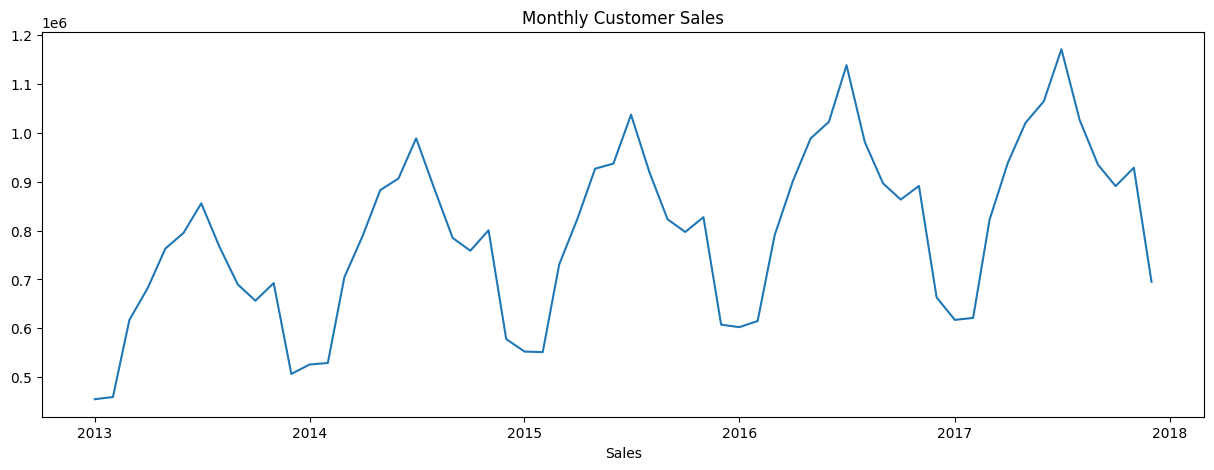

In [157]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales")
plt.show()

In [158]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


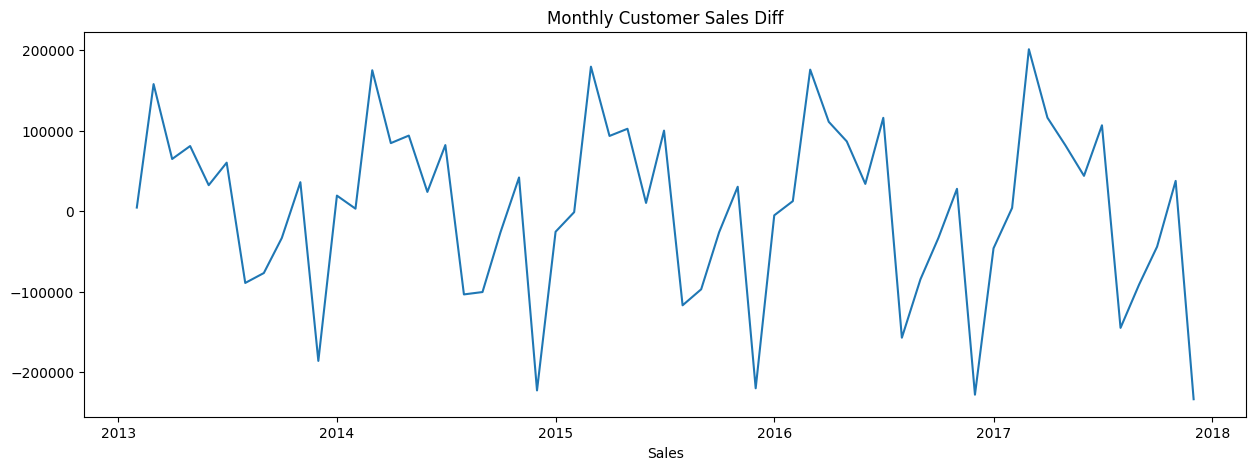

In [159]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'])
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales Diff")
plt.show()

In [160]:
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)

In [161]:
for i in range(1,13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [162]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (35, 13)
Test Data Shape: (12, 13)


In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [164]:
train_data

array([[ 0.13408606,  0.20344758, -0.81758535,  0.28633667, -0.05850103,
        -0.27488947, -0.33606217,  0.40696724,  0.26794062,  0.50957454,
         0.42966779,  0.8922929 ,  0.12955024],
       [ 0.97816867,  0.12267595,  0.20344758, -0.81758535,  0.28633667,
        -0.05850103, -0.27488947, -0.33606217,  0.40696724,  0.26794062,
         0.50957454,  0.42966779,  0.8922929 ],
       [ 0.53383488,  0.977881  ,  0.12267595,  0.20344758, -0.81758535,
         0.28633667, -0.05850103, -0.27488947, -0.33606217,  0.40696724,
         0.26794062,  0.50957454,  0.42966779],
       [ 0.5797052 ,  0.52769224,  0.977881  ,  0.12267595,  0.20344758,
        -0.81758535,  0.28633667, -0.05850103, -0.27488947, -0.33606217,
         0.40696724,  0.26794062,  0.50957454],
       [ 0.23630084,  0.574167  ,  0.52769224,  0.977881  ,  0.12267595,
         0.20344758, -0.81758535,  0.28633667, -0.05850103, -0.27488947,
        -0.33606217,  0.40696724,  0.26794062],
       [ 0.52183992,  0.226237

In [165]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (35, 12)
y_train Shape: (35,)
X_test Shape: (12, 12)
y_test Shape: (12,)


In [166]:
sales_dates = monthly_sales['date'].iloc[-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [167]:
sales_dates

0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
5    2017-06-01
6    2017-07-01
7    2017-08-01
8    2017-09-01
9    2017-10-01
10   2017-11-01
11   2017-12-01
Name: date, dtype: datetime64[ns]

In [168]:
act_sales = monthly_sales['sales'].iloc[-13:].to_list()

In [169]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_prediction = linear_regression.predict(X_test)

In [170]:
linear_regression_prediction = linear_regression_prediction.reshape(-1, 1)
linreg_test_set = np.concatenate([linear_regression_prediction, X_test], axis=1)
linreg_test_set = scaler.inverse_transform(linreg_test_set)

In [171]:
result_list = []
for index in range(0, len(linreg_test_set)):
    result_list.append(linreg_test_set[index][0] + act_sales[index])
linreg_pred_series = pd.Series(result_list, name='linreg_pred')
predict_df = predict_df.merge(linreg_pred_series, left_index=True, right_index=True)

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_rmse = np.sqrt(mean_squared_error(predict_df['linreg_pred'], monthly_sales['sales'].iloc[-12:]))
linreg_mae = mean_absolute_error(predict_df['linreg_pred'], monthly_sales['sales'].iloc[-12:])
linreg_r2 = r2_score(predict_df['linreg_pred'], monthly_sales['sales'].iloc[-12:])
print('Linear Regression: RMSE: ', linreg_rmse)
print('Linear Regression: MAE: ', linreg_mae)
print('Linear Regression R2 Score: ', linreg_r2)

Linear Regression: RMSE:  16221.272385416896
Linear Regression: MAE:  12433.184266490784
Linear Regression R2 Score:  0.9906152516380968


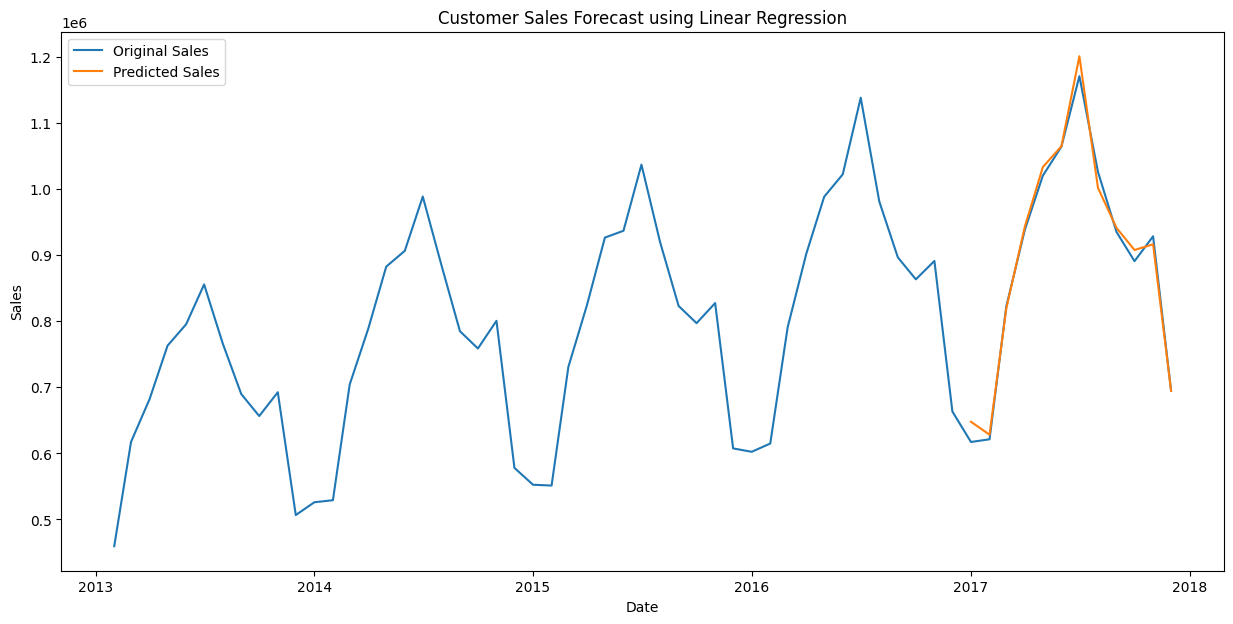

In [173]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['linreg_pred'])
plt.title("Customer Sales Forecast using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

In [174]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)

In [175]:
rf_pred = rf_pred.reshape(-1, 1)
rf_pred_test_set = np.concatenate([rf_pred, X_test], axis=1)
rf_pred_test_set = scaler.inverse_transform(rf_pred_test_set)

In [176]:
result_list = []
for index in range(0, len(linreg_test_set)):
    result_list.append(rf_pred_test_set[index][0] + act_sales[index])
rf_pred_series = pd.Series(result_list, name='rf_pred')
predict_df = predict_df.merge(rf_pred_series, left_index=True, right_index=True)

In [177]:
rf_rmse = np.sqrt(mean_squared_error(predict_df['rf_pred'], monthly_sales['sales'].iloc[-12:]))
rf_mae = mean_absolute_error(predict_df['rf_pred'], monthly_sales['sales'].iloc[-12:])
rf_r2 = r2_score(predict_df['rf_pred'], monthly_sales['sales'].iloc[-12:])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  19068.353351292804
Random Forest MAE:  15423.315833333356
Random Forest R2 Score:  0.9861310752904149


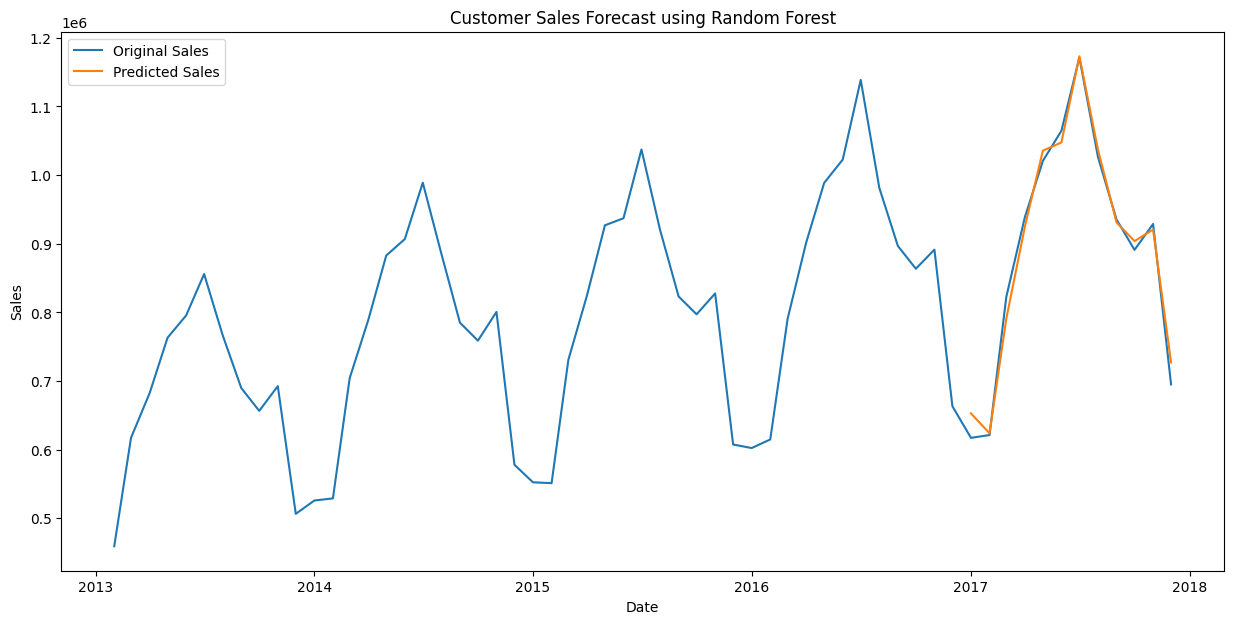

In [178]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['rf_pred'])
plt.title("Customer Sales Forecast using Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

In [179]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [180]:
xgb_pred = xgb_pred.reshape(-1,1)
xgb_pred_test_set = np.concatenate([xgb_pred,X_test], axis=1)
xgb_pred_test_set = scaler.inverse_transform(xgb_pred_test_set)

In [181]:
result_list = []
for index in range(0, len(xgb_pred_test_set)):
    result_list.append(xgb_pred_test_set[index][0] + act_sales[index])
xgb_pred_series = pd.Series(result_list, name='xgb_pred')
predict_df = predict_df.merge(xgb_pred_series, left_index=True, right_index=True)


In [182]:
xgb_rmse = np.sqrt(mean_squared_error(predict_df['xgb_pred'], monthly_sales['sales'].iloc[-12:]))
xgb_mae = mean_absolute_error(predict_df['xgb_pred'], monthly_sales['sales'].iloc[-12:])
xgb_r2 = r2_score(predict_df['xgb_pred'], monthly_sales['sales'].iloc[-12:])
print('XG Boost RMSE: ', xgb_rmse)
print('XG Boost MAE: ', xgb_mae)
print('XG Boost R2 Score: ', xgb_r2)

XG Boost RMSE:  15701.124706426719
XG Boost MAE:  13342.738751299059
XG Boost R2 Score:  0.9907513141349301


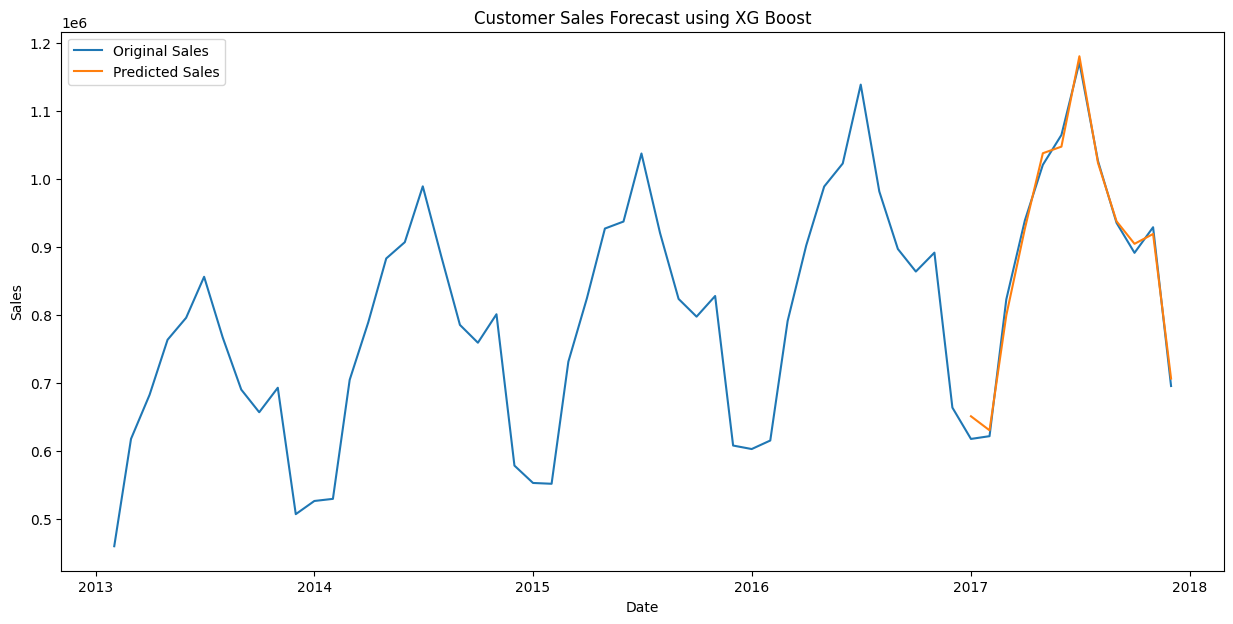

In [183]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['xgb_pred'])
plt.title("Customer Sales Forecast using XG Boost")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

In [184]:
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print(X_train_lstm.shape)
print(X_test_lstm.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train_lstm.shape[1], X_test_lstm.shape[2])))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

(35, 1, 12)
(12, 1, 12)


In [185]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=5), model_checkpoint_callback]

In [186]:
history = model.fit(X_train_lstm, y_train, epochs=200, batch_size=1, validation_data=(X_test_lstm, y_test), callbacks=callbacks)

Epoch 1/200
 1/35 [..............................] - ETA: 28s - loss: 0.1498

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 4s 81ms/step - loss: 0.2854 - val_loss: 0.3067
Epoch 2/200
 1/35 [..............................] - ETA: 0s - loss: 0.1045

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.2563 - val_loss: 0.2653
Epoch 3/200
 1/35 [..............................] - ETA: 0s - loss: 0.0124

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 61ms/step - loss: 0.2219 - val_loss: 0.2318
Epoch 4/200
 1/35 [..............................] - ETA: 0s - loss: 0.0020

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 71ms/step - loss: 0.1912 - val_loss: 0.2002
Epoch 5/200
 1/35 [..............................] - ETA: 0s - loss: 0.1808

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 60ms/step - loss: 0.1645 - val_loss: 0.1651
Epoch 6/200
 1/35 [..............................] - ETA: 0s - loss: 0.0113

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 60ms/step - loss: 0.1360 - val_loss: 0.1367
Epoch 7/200
 1/35 [..............................] - ETA: 0s - loss: 0.0643

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 72ms/step - loss: 0.1110 - val_loss: 0.1100
Epoch 8/200
 1/35 [..............................] - ETA: 0s - loss: 0.0102

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 61ms/step - loss: 0.0896 - val_loss: 0.0865
Epoch 9/200
 1/35 [..............................] - ETA: 0s - loss: 0.0900

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 61ms/step - loss: 0.0703 - val_loss: 0.0691
Epoch 10/200
 1/35 [..............................] - ETA: 0s - loss: 0.0039

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.0558 - val_loss: 0.0514
Epoch 11/200
 1/35 [..............................] - ETA: 0s - loss: 7.8927e-05

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 3s 75ms/step - loss: 0.0429 - val_loss: 0.0416
Epoch 12/200
 1/35 [..............................] - ETA: 0s - loss: 0.0253

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 60ms/step - loss: 0.0346 - val_loss: 0.0299
Epoch 13/200
 1/35 [..............................] - ETA: 0s - loss: 0.0016

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.0260 - val_loss: 0.0245
Epoch 14/200
 1/35 [..............................] - ETA: 0s - loss: 0.0132

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 71ms/step - loss: 0.0217 - val_loss: 0.0191
Epoch 15/200
 1/35 [..............................] - ETA: 0s - loss: 0.0209

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 60ms/step - loss: 0.0171 - val_loss: 0.0135
Epoch 16/200
 1/35 [..............................] - ETA: 0s - loss: 0.0106

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 17/200
 1/35 [..............................] - ETA: 0s - loss: 0.0043

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 71ms/step - loss: 0.0110 - val_loss: 0.0090
Epoch 18/200
 1/35 [..............................] - ETA: 0s - loss: 0.0105

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 60ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 19/200
 1/35 [..............................] - ETA: 0s - loss: 0.0096

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 61ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 20/200
 1/35 [..............................] - ETA: 0s - loss: 0.0081

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 73ms/step - loss: 0.0064 - val_loss: 0.0073
Epoch 21/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0074
Epoch 22/200
 1/35 [..............................] - ETA: 0s - loss: 9.4921e-04

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.0052 - val_loss: 0.0072
Epoch 23/200
 1/35 [..............................] - ETA: 0s - loss: 0.0197

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 61ms/step - loss: 0.0048 - val_loss: 0.0071
Epoch 24/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0076
Epoch 25/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 0.0073
Epoch 26/200
 1/35 [..............................] - ETA: 0s - loss: 0.0018

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 72ms/step - loss: 0.0043 - val_loss: 0.0071
Epoch 27/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0077
Epoch 28/200
 1/35 [..............................] - ETA: 0s - loss: 0.0025

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 61ms/step - loss: 0.0039 - val_loss: 0.0071
Epoch 29/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0071
Epoch 30/200
 1/35 [..............................] - ETA: 0s - loss: 0.0021

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.0040 - val_loss: 0.0070
Epoch 31/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0073
Epoch 32/200
 1/35 [..............................] - ETA: 0s - loss: 1.7032e-04

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 2s 62ms/step - loss: 0.0036 - val_loss: 0.0069
Epoch 33/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 34/200
 1/35 [..............................] - ETA: 0s - loss: 2.7662e-05

INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


INFO:tensorflow:Assets written to: C:\Users\Dominik\Workspace\machine-learning\store-demand-forecast\assets


35/35 [==============================] - 3s 74ms/step - loss: 0.0036 - val_loss: 0.0065
Epoch 35/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0069
Epoch 36/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0068
Epoch 37/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0067
Epoch 38/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0069
Epoch 39/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0071


In [187]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

        loss  val_loss
0   0.285442  0.306705
1   0.256274  0.265250
2   0.221905  0.231824
3   0.191169  0.200230
4   0.164455  0.165060
5   0.135960  0.136735
6   0.111017  0.109952
7   0.089611  0.086534
8   0.070293  0.069122
9   0.055784  0.051356
10  0.042903  0.041582
11  0.034595  0.029875
12  0.025984  0.024473
13  0.021692  0.019091
14  0.017070  0.013470
15  0.013329  0.011192
16  0.011032  0.009018
17  0.008949  0.008498
18  0.007464  0.008375
19  0.006402  0.007279
20  0.005787  0.007357
21  0.005235  0.007197
22  0.004844  0.007126
23  0.004591  0.007553
24  0.004489  0.007322
25  0.004342  0.007077
26  0.004267  0.007677
27  0.003913  0.007071
28  0.004063  0.007125
29  0.004001  0.006968
30  0.003675  0.007344
31  0.003623  0.006923
32  0.003654  0.007006
33  0.003587  0.006458
34  0.003439  0.006879
35  0.003622  0.006836
36  0.003356  0.006718
37  0.003273  0.006890
38  0.003259  0.007052


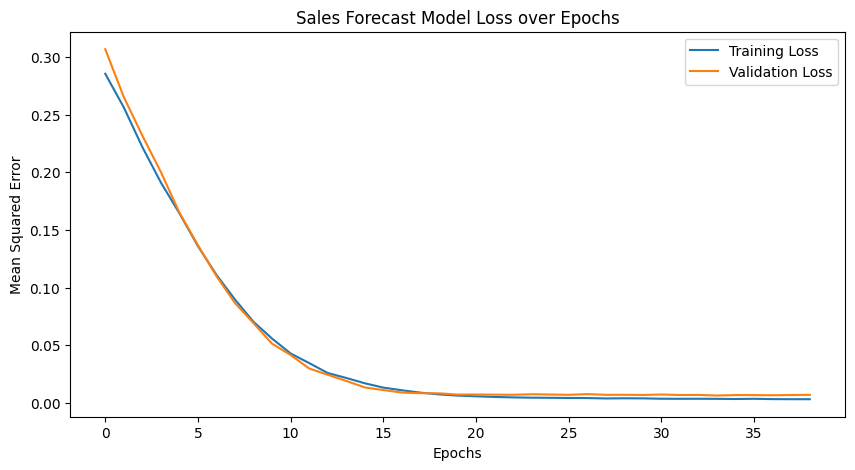

In [188]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('Sales Forecast Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [189]:
lstm_pred = model.predict(X_test_lstm, batch_size=1)

12/12 [==============================] - 0s 637us/step


In [190]:
lstm_pred = lstm_pred.reshape(-1,1)
lstm_pred_test_set = np.concatenate([lstm_pred,X_test], axis=1)
lstm_pred_test_set = scaler.inverse_transform(lstm_pred_test_set)

In [191]:
result_list = []
for index in range(0, len(lstm_pred_test_set)):
    result_list.append(lstm_pred_test_set[index][0] + act_sales[index])
lstm_pred_series = pd.Series(result_list, name='lstm_pred')
predict_df = predict_df.merge(lstm_pred_series, left_index=True, right_index=True)

In [192]:
lstm_rmse = np.sqrt(mean_squared_error(predict_df['lstm_pred'], monthly_sales['sales'].iloc[-12:]))
lstm_mae = mean_absolute_error(predict_df['lstm_pred'], monthly_sales['sales'].iloc[-12:])
lstm_r2 = r2_score(predict_df['lstm_pred'], monthly_sales['sales'].iloc[-12:])
print('LSTM RMSE: ', lstm_rmse)
print('LSTM MAE: ', lstm_mae)
print('LSTM R2 Score: ', lstm_r2)

LSTM RMSE:  17117.031914715255
LSTM MAE:  11306.823481966509
LSTM R2 Score:  0.989225329217843


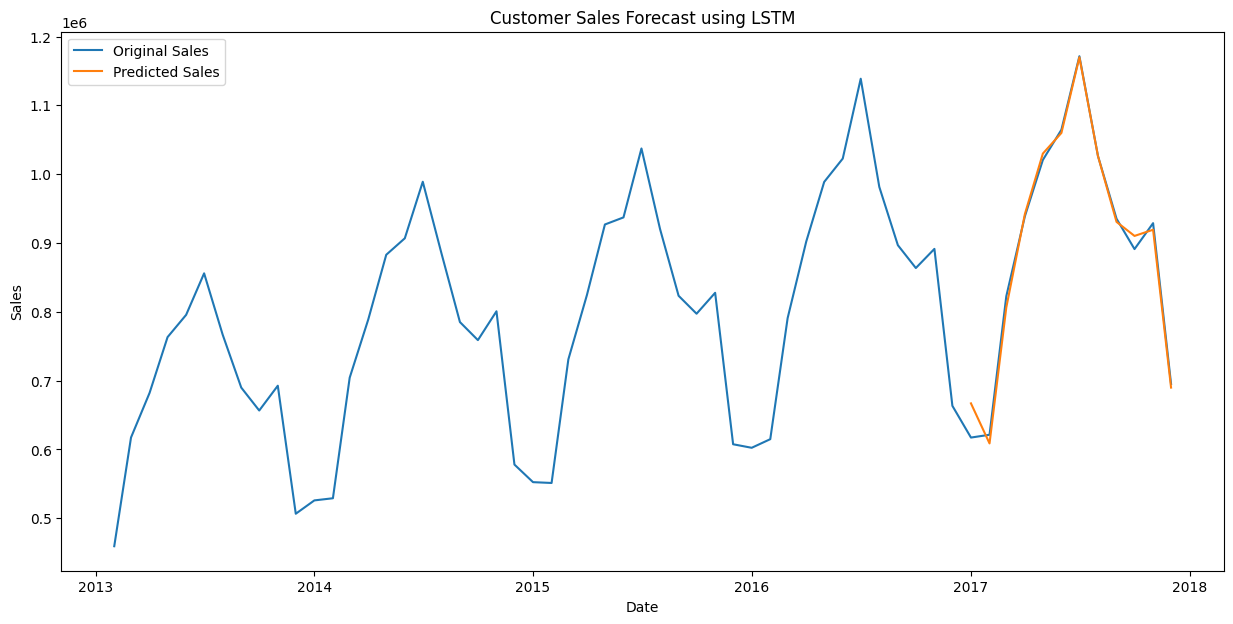

In [193]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['lstm_pred'])
plt.title("Customer Sales Forecast using LSTM")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

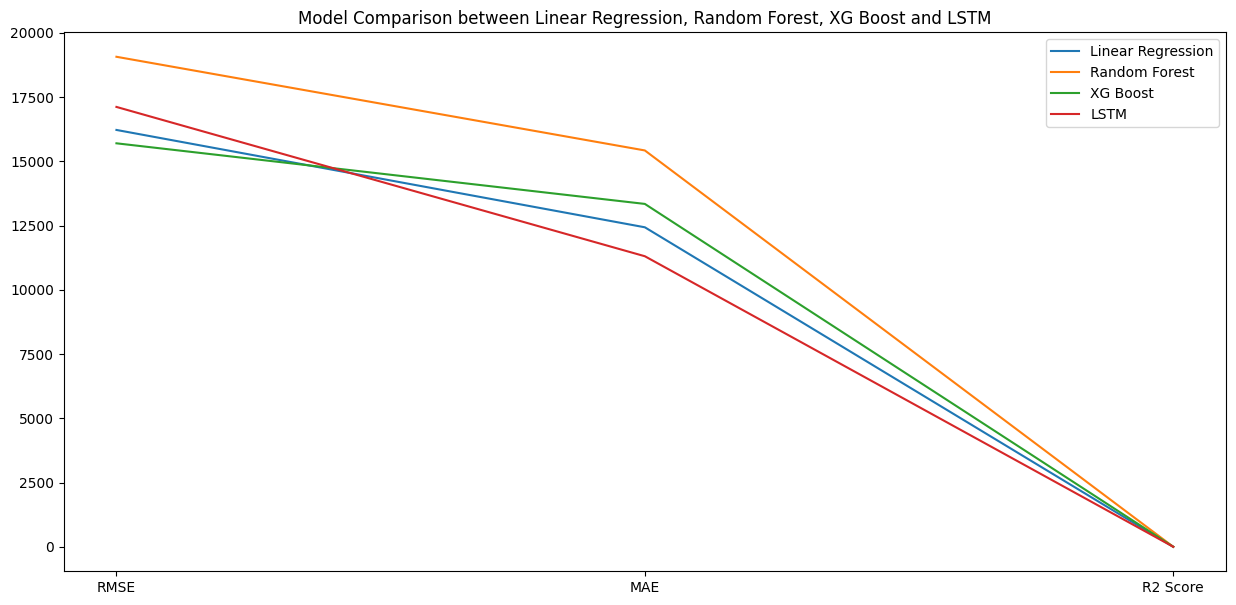

In [194]:
plt.figure(figsize=(15,7))
plt.plot([linreg_rmse, linreg_mae, linreg_r2])
plt.plot([rf_rmse, rf_mae, rf_r2])
plt.plot([xgb_rmse, xgb_mae, xgb_r2])
plt.plot([lstm_rmse, lstm_mae, lstm_r2])
plt.title("Model Comparison between Linear Regression, Random Forest, XG Boost and LSTM")
plt.xticks([0,1,2], labels=['RMSE','MAE','R2 Score'])
plt.legend(["Linear Regression", "Random Forest", "XG Boost", "LSTM"])
plt.show()